This notebook shows how to read and create plots of outputs by the scripts:

- src/summe_eval_human_summary.py
- src/summe_eval_random_summary.py
- src/tvsum_eval_human_summary.py
- src/tvsum_eval_random_summary.py

In [1]:
%cd ../

/data/mayu-ot/Experiments/rethinking-evs


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
def load_tvsum_result():
    results = []
    for method in ['Random', 'Human']:
        df = pd.read_csv(f'data/processed/tvsum_{method.lower()}_eval.csv')
        df_mean = pd.DataFrame(
                            {'F1 score': df['mean'],
                             'type': ['mean'] * len(df),
                             'segmentation':df['seg_type'],
                             'summary_type':[method]*len(df)
                            })
        df_max = pd.DataFrame(
                            {'F1 score': df['max'],
                             'type': ['max'] * len(df),
                             'segmentation':df['seg_type'],
                             'summary_type':[method]*len(df)
                            })
        df = pd.concat([df_mean, df_max])
        results.append(df)

    df_all = pd.concat(results)
    return df_all

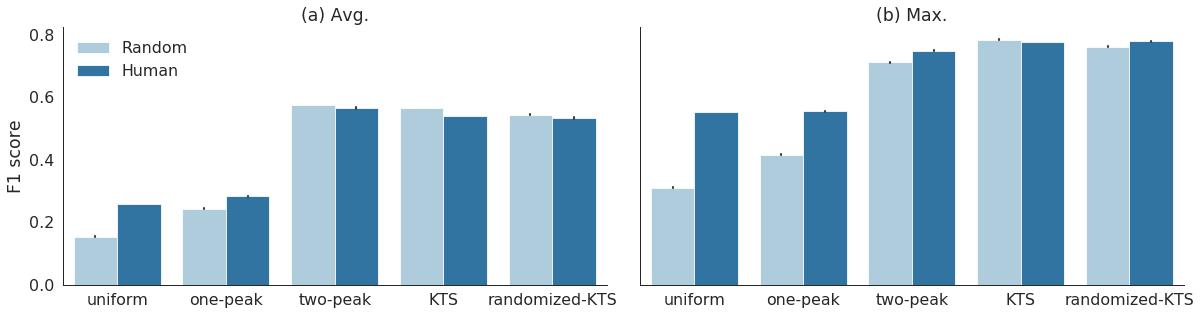

In [4]:
df_all = load_tvsum_result()
sns.set_style('white')
sns.set_context("paper", font_scale=1.8) 
sns.set_palette('Paired')
g = sns.catplot(x='segmentation',
                y='F1 score',
                order=['uniform', 'one-peak', 'two-peak', 'KTS', 'randomized-KTS'],
                hue='summary_type',
                ci=90, col='type',
                kind='bar',
                data=df_all,
                aspect=1.7,
                legend=False)
g.set_xlabels("")
g.axes[0, 0].legend(loc='upper left', edgecolor='w')
g.axes[0,0].set_title('(a) Avg.')
g.axes[0,1].set_title('(b) Max.')
plt.show()

Text(0.5, 1.0, '(b) Max.')

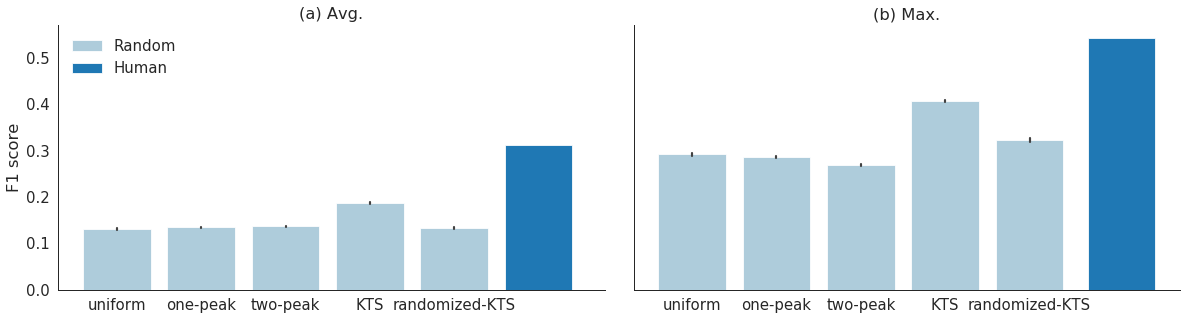

In [5]:
def load_summe_result():
    df = pd.read_csv('data/processed/summe_random_eval.csv')

    results = []

    for metric in ['mean', 'max']:
        df_sub = pd.DataFrame(
                        {'F1 score': df[metric],
                         'type': [metric] * len(df),
                         'segmentation':df['seg_type'],
                         'summary_type':['Random']*len(df)
                        })
        results.append(df_sub)

    df_rand = pd.concat(results)
    
    df = pd.read_csv('data/processed/summe_human_eval.csv')
    
    sub_df = df[df.metric=='mean']
    mean_score = sub_df.mean(axis=0)['avg_human']
    
    sub_df = df[df.metric=='max']
    max_score = sub_df.mean(axis=0)['avg_human']

    df_hum = pd.DataFrame(
                    {'F1 score':[mean_score, max_score],
                     'type':['mean', 'max'],
                     'segmentation': ['None']*2,
                     'summary_type': ['Human']*2,
                    })
    
    return df_rand, df_hum

df_rand, df_hum = load_summe_result()

sns.set_style('white')
sns.set_context("paper", font_scale=1.7) 
c_rand = sns.color_palette('Paired')[0]
c_human = sns.color_palette('Paired')[1]

g = sns.catplot(x='segmentation',
                y='F1 score',
                hue='summary_type',
                order=['uniform', 'one-peak', 'two-peak', 'KTS', 'randomized-KTS'],
                palette=[c_rand],
                ci=90,
                col='type',
                kind='bar',
                data=df_rand,
                aspect=1.7,
                legend=False)

g.axes[0,0].bar(g.axes[0,0].get_xlim()[-1]+.5,
                df_hum[df_hum.type=='mean']['F1 score'],
                width=.8,
                label='Human',
                color=c_human)
g.axes[0,1].bar(g.axes[0,1].get_xlim()[-1]-.6,
                df_hum[df_hum.type=='max']['F1 score'],
                width=.8,
                label='Human',
               color=c_human)

g.set_xlabels("")
g.axes[0, 0].legend(loc='upper left', edgecolor='w')
g.axes[0,0].set_title('(a) Avg.')
g.axes[0,1].set_title('(b) Max.')